In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 图像处理实验第二部分：目标计数

## 实验内容：实现自动计算目标个数

子环节一：对`points.png`中的端点数量进行计数

子环节二：对`clip.png`中的回形针数量进行计数

## 实验图片数据
+ 文件夹`./png_files/2`中的`points.png` & `clip.png`两张图片

## 一、对端点进行计数

使用`points.png`，实验步骤：

### 1. 读取并显示原图

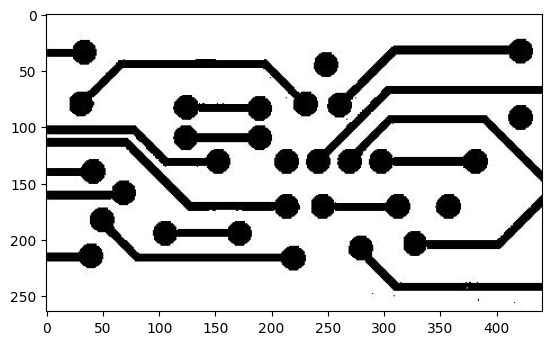

In [2]:
img = cv2.imread("./png_files/2/points.png", 0)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 2. 将原图反色

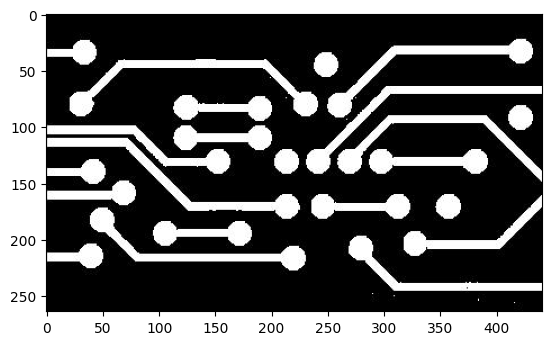

In [3]:
img = 255 - img

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 3. 使用大津法对原图做二值化处理

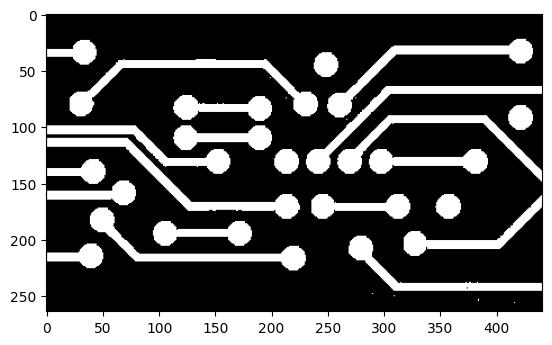

In [4]:
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 4. 定义一个3×3的卷积核，对图像做一次开运算

你定义的卷积核应该是这个样子：
[[1 1 1]
 [1 1 1]
 [1 1 1]]


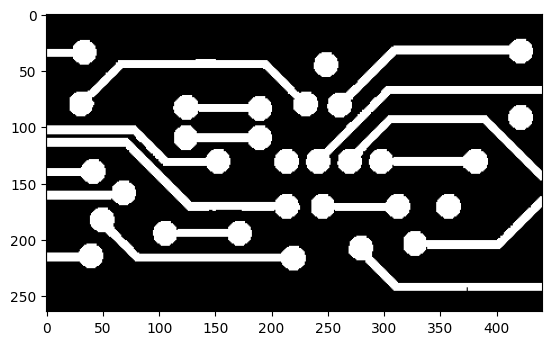

In [5]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
print('你定义的卷积核应该是这个样子：')
print(element)

img = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 5. 定义一个圆形的结构体（半径数值自己把握），使用cv2.circle()方法

#### cv2.circle()用法：

##### 输入参数：
1. img：待画图的图像变量（你打算在哪张图片上画个圆）
2. center：圆心坐标点，元组或者列表类型，例如：(10,10)
3. radius：圆的半径值
4. color：画出来的圆应该用什么颜色填充
5. thickness：设定为正数时，定义着圆边界的宽度；设定为负数时，画出来的圆会被完全填充

##### 函数返回：
+ 返回一个在img上画好圆的图像变量

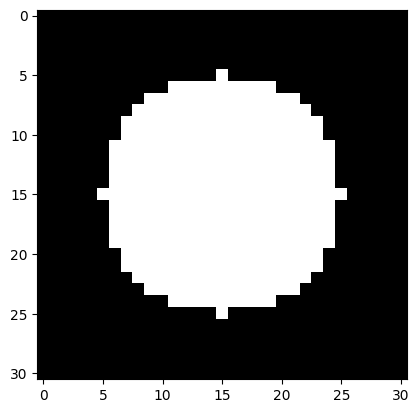

In [6]:
bg = np.zeros((31,31), dtype=np.uint8)

circle = cv2.circle(bg, (15,15), 10, 255, -1) 

plt.figure()
plt.imshow(circle, cmap='gray')
plt.show()

### 6. 使用刚才定义好的圆形去腐蚀我们处理好的图片：img

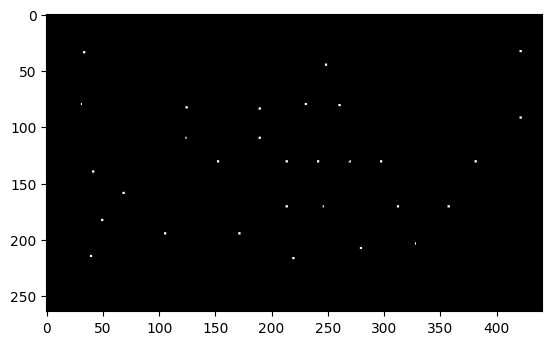

In [7]:
image_erosion = cv2.erode(img, circle)

plt.figure()
plt.imshow(image_erosion, cmap='gray')
plt.show()

### 7. 数数上图中有多少个连通域，使用cv2.findContours()方法

#### cv2.findContours()用法：

##### 输入参数：

+ 第一个参数是待寻找轮廓的图像
+ 第二个参数表示轮廓的检索模式，有四种：
    
    1. cv2.RETR_EXTERNAL：表示只检测外轮廓
    
    2. cv2.RETR_LIST：检测的轮廓不建立等级关系
    
    3. cv2.RETR_CCOMP：建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层
    
    4. cv2.RETR_TREE：建立一个等级树结构的轮廓。

+ 第三个参数method为轮廓的近似办法
    
    1. cv2.CHAIN_APPROX_NONE：存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    
    2. cv2.CHAIN_APPROX_SIMPLE：压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
    
    3. cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS：使用teh-Chinl chain 近似算法

##### 函数返回：

cv2.findContours()函数返回两个值，第一个是得到的轮廓，第二个是每条轮廓对应的属性

In [8]:
contours, _ = cv2.findContours(image_erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(len(contours))

30


## 二、对回形针进行计数

使用`clip.png`，实验步骤：

### 1. 读取并显示灰度图片

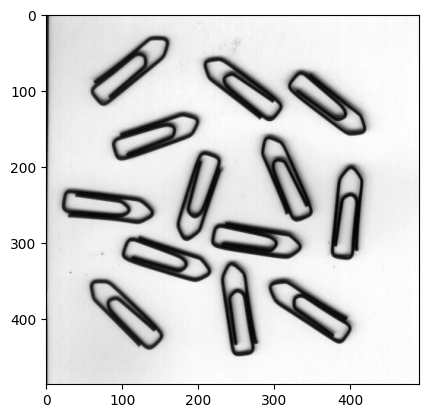

In [9]:
img = cv2.imread("./png_files/2/clip.png", 0)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 2. 对图片进行反色操作

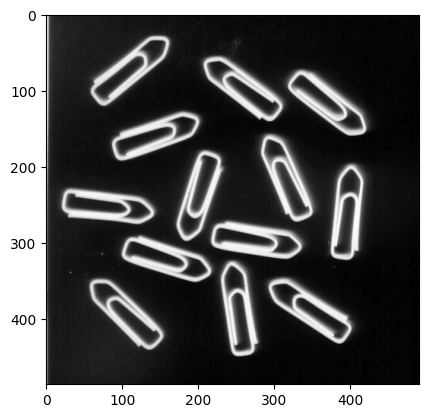

In [10]:
img = 255 - img

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 3. 使用大津法对图像进行二值化操作

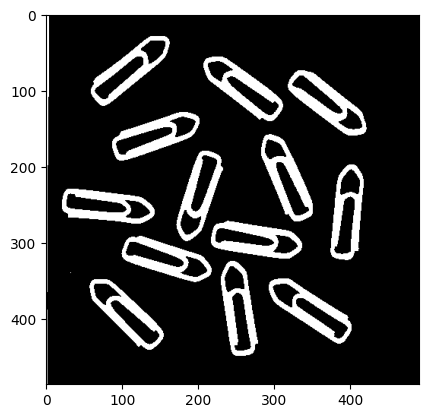

In [11]:
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 4. 定义一个3×3的卷积核，对图像做一次开运算

你定义的卷积核应该是这个样子：
[[1 1 1]
 [1 1 1]
 [1 1 1]]


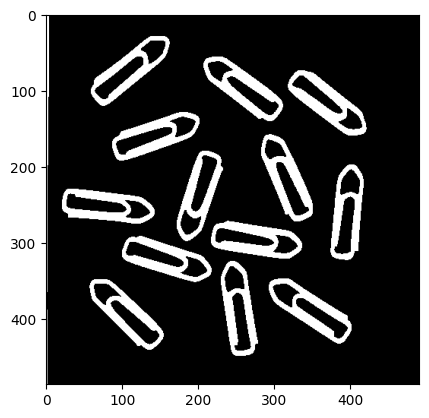

In [12]:
 #定义结构元素
element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
print('你定义的卷积核应该是这个样子：')
print(element)

#对图像进行开运算处理，消除一些杂点
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### 5. 使用cv2.findContours()方法，检测有多少个连通域

#### cv2.findContours()用法：

##### 输入参数：

+ 第一个参数是待寻找轮廓的图像
+ 第二个参数表示轮廓的检索模式，有四种：
    
    1. cv2.RETR_EXTERNAL：表示只检测外轮廓
    
    2. cv2.RETR_LIST：检测的轮廓不建立等级关系
    
    3. cv2.RETR_CCOMP：建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层
    
    4. cv2.RETR_TREE：建立一个等级树结构的轮廓。

+ 第三个参数method为轮廓的近似办法
    
    1. cv2.CHAIN_APPROX_NONE：存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    
    2. cv2.CHAIN_APPROX_SIMPLE：压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
    
    3. cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS：使用teh-Chinl chain 近似算法

##### 函数返回：

cv2.findContours()函数返回两个值，第一个是得到的轮廓，第二个是每条轮廓对应的属性

共检测到15个连通域


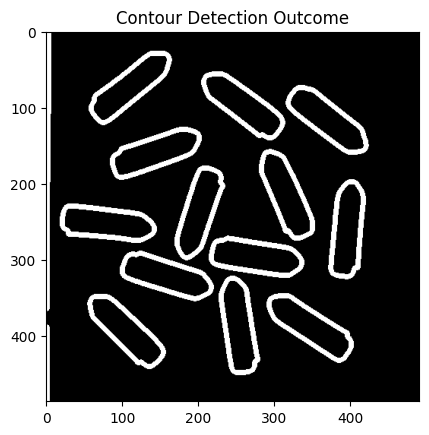

在实验环节，你不需要把连通域检测结果（上图）画出来


In [13]:
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

bg = np.zeros(img.shape, dtype=np.uint8)

for contour in contours:
    bg = cv2.drawContours(bg, contour, -1, 255, 5)

print('共检测到{}个连通域'.format(len(contours)))
plt.figure()
plt.title('Contour Detection Outcome')
plt.imshow(bg, cmap='gray')
plt.show()
print('在实验环节，你不需要把连通域检测结果（上图）画出来')

### 6. 去除不符合回形针形状的连通域，使用cv2.boundingRect()的方法

#### cv2.boundingRect()用法：

##### 功能：
+ 可以求出一个连通域的外接矩形的**左上角顶点、宽和高**

##### 函数输入：
+ 单个的连通域，可以理解为是你通过`cnt, _ = cv2.findContours()`得到的`cnt`变量中的一个元素

##### 函数的输出：
+ `x,y,w,h`
1. x：外接矩形的x轴坐标
2. y：外接矩形的y轴坐标
3. w：外接矩形的宽
4. h：外接矩形的高

In [14]:
counts = 0
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if h/w < 10:
        counts += 1
print('图片中有{}个曲别针'.format(counts))

图片中有13个曲别针


### 实验上交内容
1. 实验报告（具体要求见实验报告模板）
2. 该.ipynb文件

#### 注：

*评分细则详见评分标准文档